In [1]:
# import all necessary libraries
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# A simple function to display the image using matplotlib
def show(img, cmap = None, figsize = (7, 7)):
    plt.figure(figsize = figsize)
    if cmap is not None:
        plt.imshow(img, cmap = cmap), plt.axis('off')
    else:
        plt.imshow(img), plt.axis('off')

# Corner Detection

- corner can be interpreted as the junction of two edges where there is sudden change in brightness
- most popular edge detection algorithms are
  1. Harris Corner Detection
  2. Shi-Thomsi Corner Detection

## Harris Corner Detection


(256, 256, 3)


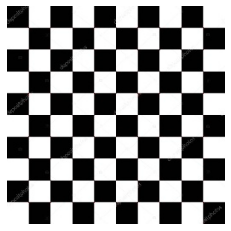

In [42]:
chess = cv2.imread("data/chess.jpeg")
print(chess.shape)
gray_chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)
show(chess, figsize = (4, 4), cmap = 'gray')

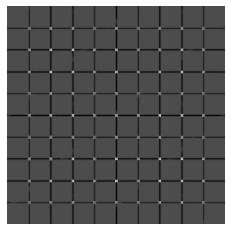

In [43]:
# Convert chess image array type from int to float32
float_chess = np.float32(gray_chess)

# use 'cornerharris' cv2's in-built function to detect corners
out = cv2.cornerHarris(src = float_chess, blockSize = 2, ksize = 3, k = 0.04)

#display out
show(out, cmap = 'gray', figsize = (4, 4))

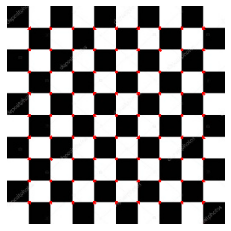

In [44]:
# Now, get the pixel value which are less that 2% of the max pixel values.
# These values represents the edges

draw = chess.copy()
draw[out>0.02*out.max()] = [255, 0, 0]

show(draw, figsize = (4, 4))

# Shi-Thomsi Corner Detection

- opencv has in-built function named `cv2.goodFeaturesToTrack()` for **Shi-Thomsi Corner Detection**
- For detailed information about the method refer [paper](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf)

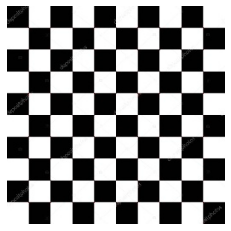

In [46]:
# Load the image and convert it to grayscale
chess = cv2.imread("data/chess.jpeg")
gray_chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)

# display
show(chess, figsize = (4, 4), cmap = 'gray')

In [59]:
# Use 'cv2.goodFeaturesToTrack()' method  to detect 10 corners

maxCorners = 10 
maxCorners_all = 0 # 0 for all the corners
qualityLevel = 0.01 # default
minDistance = 10 # default

# returns floating type value for the location of detected corners
corners_10 = cv2.goodFeaturesToTrack(gray_chess, maxCorners, qualityLevel, minDistance)
corners_all = cv2.goodFeaturesToTrack(gray_chess, maxCorners_all, qualityLevel, minDistance)

# convert floating values to int so that can be used in cv2.circle
corners_10 = np.int0(corners_10)
corners_all = np.int0(corners_all)


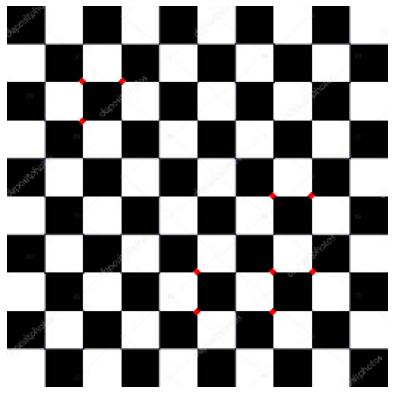

In [57]:
# interate over all the corners and draw circle to the corners on original image

draw = chess.copy()
for c in corners_10:
    x, y = c.ravel()
    cv2.circle(draw, (x, y), 2, (0, 0, 255), -1)
show(draw[:, :, ::-1])

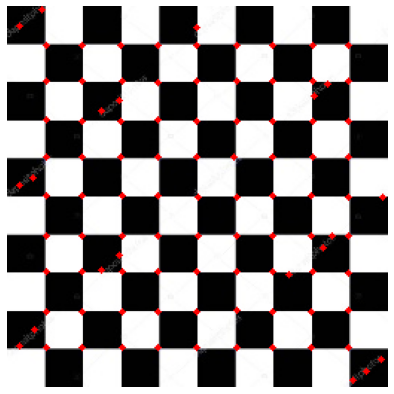

In [58]:
# iterate over all the corners and draw circle to the corners on original image

draw = chess.copy()
for c in corners_all:
    x, y = c.ravel()
    cv2.circle(draw, (x, y), 2, (0, 0, 255), -1)
show(draw[:, :, ::-1])